In [18]:
#!/usr/bin/python

import sys
import pickle
import matplotlib.pyplot
#sys.path.append("../tools/")

from feature_format import featureFormat, targetFeatureSplit
from tester import dump_classifier_and_data

### Task 1: Select what features you'll use.
### features_list is a list of strings, each of which is a feature name.
### The first feature must be "poi".
features_list = ['poi','salary'] # You will need to use more features

### Load the dictionary containing the dataset
with open("final_project_dataset.pkl", "r") as data_file:
    data_dict = pickle.load(data_file)
print 'number of people in data set = ', len(data_dict)
print 'features for every person in the data set:\n', data_dict['LAY KENNETH L'].keys()

number of people in data set =  146
features for every person in the data set:
['salary', 'to_messages', 'deferral_payments', 'total_payments', 'exercised_stock_options', 'bonus', 'restricted_stock', 'shared_receipt_with_poi', 'restricted_stock_deferred', 'total_stock_value', 'expenses', 'loan_advances', 'from_messages', 'other', 'from_this_person_to_poi', 'poi', 'director_fees', 'deferred_income', 'long_term_incentive', 'email_address', 'from_poi_to_this_person']


In [57]:
### Task 2: Remove outliers
''' as seen in the outliers section, we saw that there was a "Total" entry in the data set that was a clear outlier.
thus we are removing it
'''
data_dict.pop("TOTAL",0)

0

In [53]:
### Task 3: Create new feature(s)
# creating total number of emails a POI was in, whether if they sent it, recieved, or was shared with them
list_of_nums=[]
count = 0
for person in data_dict:
    data_dict[person]['total_poi_emails'] = 0
    if data_dict[person]['from_this_person_to_poi'] =='NaN':
        data_dict[person]['from_this_person_to_poi'] = 0
    if data_dict[person]['shared_receipt_with_poi'] =='NaN':
        data_dict[person]['shared_receipt_with_poi'] = 0
    if data_dict[person]['from_poi_to_this_person'] == 'NaN':
        data_dict[person]['from_poi_to_this_person'] = 0
    list_of_nums.append(data_dict[person]['from_poi_to_this_person'])
    list_of_nums.append(data_dict[person]['shared_receipt_with_poi'])
    list_of_nums.append(data_dict[person]['from_poi_to_this_person'])
    data_dict[person]['total_poi_emails'] = sum(list_of_nums)
    #print data_dict[person]['total_poi_emails']
    del list_of_nums[:]

#print 'features for every person in the data set:\n', data_dict['LAY KENNETH L']
### Store to my_dataset for easy export below.
my_dataset = data_dict


features for every person in the data set:
{'to_messages': 4273, 'deferral_payments': 202911, 'expenses': 99832, 'total_poi_emails': 2657, 'poi': True, 'deferred_income': -300000, 'email_address': 'kenneth.lay@enron.com', 'long_term_incentive': 3600000, 'restricted_stock_deferred': 'NaN', 'shared_receipt_with_poi': 2411, 'loan_advances': 81525000, 'from_messages': 36, 'other': 10359729, 'director_fees': 'NaN', 'bonus': 7000000, 'total_stock_value': 49110078, 'from_poi_to_this_person': 123, 'from_this_person_to_poi': 16, 'restricted_stock': 14761694, 'salary': 1072321, 'total_payments': 103559793, 'exercised_stock_options': 34348384}


In [56]:
# Check if POIs have a 0 total poi emails
for person in data_dict:
    if data_dict[person]['poi']:
        if data_dict[person]['total_poi_emails']==0:
            print person
        

KOPPER MICHAEL J
FASTOW ANDREW S
YEAGER F SCOTT
HIRKO JOSEPH


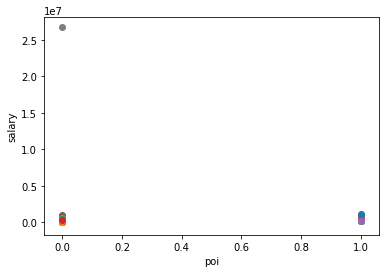

In [20]:
### Extract features and labels from dataset for local testing
data = featureFormat(my_dataset, features_list, sort_keys = True)
labels, features = targetFeatureSplit(data)

    
for point in data:
    poi = point[0]
    salary = point[1]
    matplotlib.pyplot.scatter( poi, salary )

    
matplotlib.pyplot.xlabel("poi")
matplotlib.pyplot.ylabel("salary")
matplotlib.pyplot.show()
    

In [ ]:
### Task 4: Try a varity of classifiers
### Please name your classifier clf for easy export below.
### Note that if you want to do PCA or other multi-stage operations,
### you'll need to use Pipelines. For more info:
### http://scikit-learn.org/stable/modules/pipeline.html

# Provided to give you a starting point. Try a variety of classifiers.
from sklearn.naive_bayes import GaussianNB
clf = GaussianNB()

### Task 5: Tune your classifier to achieve better than .3 precision and recall 
### using our testing script. Check the tester.py script in the final project
### folder for details on the evaluation method, especially the test_classifier
### function. Because of the small size of the dataset, the script uses
### stratified shuffle split cross validation. For more info: 
### http://scikit-learn.org/stable/modules/generated/sklearn.cross_validation.StratifiedShuffleSplit.html




In [ ]:
# Example starting point. Try investigating other evaluation techniques!
from sklearn.cross_validation import train_test_split
features_train, features_test, labels_train, labels_test = \
    train_test_split(features, labels, test_size=0.3, random_state=42)

In [ ]:
### Task 6: Dump your classifier, dataset, and features_list so anyone can
### check your results. You do not need to change anything below, but make sure
### that the version of poi_id.py that you submit can be run on its own and
### generates the necessary .pkl files for validating your results.

dump_classifier_and_data(clf, my_dataset, features_list)